In [28]:
from __future__ import print_function

import random
import csv
import os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from ipywidgets import widgets
%matplotlib inline

state = {1: 'growing', 2 : 'shrinking', 3 : 'resting'}
catastropheFreq = 0.024
rescueFreq = 0.018
initiationFreq = 0.1
growthRate = 0.18
shrinkRate = 0.33
# 5 parameters of MT dynamics
# experiment settings

timeOfExp = 3600
timeOfSimulation = 50
# List to store the length(time) for plotting and recording

In [29]:
# judge whether a catastrophe happen
def catastropheStart():
	prob = random.random()
	if prob < catastropheFreq:
		return True
	else:
		return False

def rescueStart():
	prob = random.random()
	if prob < rescueFreq:
		return True
	else:
		return False

def cataOrRes(currentState):
	if currentState == 1:
		#print 'MT is %s' % state[currentState]
		if catastropheStart():
			#print 'A catastrophe just happened.'
			currentState = 2
		else:
			#print 'Keep growing'
			currentState = 1
		
	elif currentState == 2:
		#print 'MT is %s' % state[currentState]
		if rescueStart():
			#print 'A rescue just happened'
			currentState = 1
		else:
			#print 'Keep shrinking.'
			currentState = 2
	else:
		pass
	return currentState

def ifRest(currentLength, currentState):
	if currentLength < 0:
		currentLength = 0
		currentState = 3
	if currentLength >= 0:
		pass
	return currentLength, currentState

def growFromZero():
	prob = random.random()
	if prob < initiationFreq:
		#print 'start growing from zero'
		return True
	else:
		return False

def grow(currentLength, growthRate):
	currentLength = currentLength + growthRate
	return currentLength, growthRate

def shrink(currentLength, shrinkRate):
	currentLength = currentLength - shrinkRate
	return currentLength, shrinkRate

In [30]:
def simulation(catastropheFreq, rescueFreq,  growthRate,
               shrinkRate):
    initialLength = 0
    initialTime = 0
    initialState = 1
    currentLength = initialLength
    currentTime = initialTime
    currentState = initialState
    
    initiationFreq = 0.1
    
    currentExpCount = 0
    timeOfExp = 3600 #s
    numberOfMT = 20
    intervalTime = 1 #s
    lengthPerMin = []
    length = [initialLength]
    time = [initialTime]

    while currentExpCount < numberOfMT:

        lengthList = [currentLength]
        timeList = [currentTime]

        while currentTime < timeOfExp:

            currentState = cataOrRes(currentState)

            if currentState == 1:
                currentLength, growthRate = grow(currentLength, growthRate)
            if currentState == 2:
                currentLength, shrinkRate = shrink(currentLength, shrinkRate)
            if currentState == 3:
                if growFromZero():
                    grow(currentLength, growthRate)
                    currentState = 1
            else:
                pass

            currentLength, currentState = ifRest(currentLength, currentState)

            currentTime += intervalTime

            if currentTime % 300 == 0:
                lengthList.append(currentLength)
                timeList.append(currentTime)


        lengthPerMin.append(lengthList)
        currentExpCount += 1
        currentTime = initialTime
        currentLength = initialLength
        currentState = initialState
        
    data = np.asarray(lengthPerMin)
    averageData = np.mean(data, axis = 0)
    
    return averageData

In [31]:
# Here is the part that output the average length of MT at 20 mins.

timesOfSimulation = np.arange(timeOfSimulation)


def finalSimulation_twenty_m_length(catastropheFreq, rescueFreq, growthRate,
               shrinkRate):
    averageData = []
    simulationData = []
    for i in timesOfSimulation:
        averageData = simulation(catastropheFreq, rescueFreq, growthRate,
                   shrinkRate)

        simulationData.append(averageData.tolist())
        averageData = []


    finalSimulationData = np.mean(np.asarray(simulationData), axis = 0)
    SEM = np.std(np.asarray(simulationData), axis = 0)
    time = np.linspace(0, (timeOfExp / 300) * 5, (timeOfExp / 300) + 1)

#     plt.errorbar(time, finalSimulationData, yerr = SEM)
#     plt.close()
    
    return finalSimulationData[4]

twenty_m_result = finalSimulation_twenty_m_length(catastropheFreq, rescueFreq, growthRate, shrinkRate)
print(twenty_m_result)

11.6619


(array([  0.        ,  11.50553571,  13.66204286,  12.18521786,
         13.05310714,  12.56620714,  12.8766    ,  12.94794643,
         13.49696786,  13.95859286,  13.63563214,  14.50310357,  16.52206071]),
 array([ 0.        ,  1.70269902,  2.43102656,  1.89403807,  3.06828465,
         3.52809007,  3.18728518,  1.89881409,  1.99935702,  2.36303687,
         1.87594688,  2.17991677,  3.09037318]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.]))

<function __main__.finalSimulation>

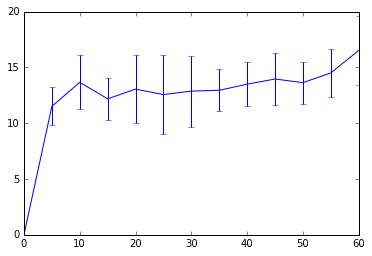

In [5]:
# A widget for intereactive simulation.

timesOfSimulation = np.arange(timeOfSimulation)


def finalSimulation(catastropheFreq, rescueFreq, growthRate,
               shrinkRate):
    averageData = []
    simulationData = []
    for i in timesOfSimulation:
        averageData = simulation(catastropheFreq, rescueFreq, growthRate,
                   shrinkRate)

        simulationData.append(averageData.tolist())
        averageData = []


    finalSimulationData = np.mean(np.asarray(simulationData), axis = 0)
    SEM = np.std(np.asarray(simulationData), axis = 0)
    time = np.linspace(0, (timeOfExp / 300) * 5, (timeOfExp / 300) + 1)

    plt.errorbar(time, finalSimulationData, yerr = SEM)
    
    return finalSimulationData, SEM, time

widgets.interact(finalSimulation, 
                catastropheFreq = (0.0017, 0.03, 0.001),
                rescueFreq = (0.015, 0.025, 0.001),
                growthRate = (0.013, 0.37, 0.01),
                shrinkRate = (0.12, 0.42, 0.03),
                )
